### I. Traitement et mises en forme de données d'entraînement. 

In [2]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# 1. Charger et nettoyer les données

# xtrain
xtrain_path = "x_train_Meacfjr.csv"
xtrain = pd.read_csv(xtrain_path)

# Convertir job_ids et actions en listes Python
xtrain['job_ids'] = xtrain['job_ids'].apply(ast.literal_eval)
xtrain['actions'] = xtrain['actions'].apply(ast.literal_eval)

# ytrain
ytrain_path ="y_train_SwJNMSu.csv"
ytrain = pd.read_csv(ytrain_path)

# joblist
joblist_path = "job_listings.json"
import json
with open(joblist_path, "r", encoding="utf-8") as f:
    data = json.load(f)

joblist = pd.DataFrame.from_dict(data, orient="index", columns=["raw_text"])
joblist = joblist.reset_index().rename(columns={"index": "job_id"})
joblist = joblist.fillna("")

# Fusionner le contenu textuel pour créer une colonne 'text'
joblist["text"] = (
    joblist["raw_text"].astype(str)
)


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # sert à rien , encodeur nul , ne comprend p

# ------------------------------
# 1. Transformation des jobs_id en entiers . 
# ------------------------------
joblist['job_id'] = joblist['job_id'].astype(int)
xtrain.columns


Index(['session_id', 'job_ids', 'actions'], dtype='object')

### Encodage du contenu des offres d'emploi

In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(
    joblist["text"].tolist(),
    batch_size=32,       # tu peux augmenter selon la RAM
    convert_to_numpy=True,
    show_progress_bar=True
)

joblist["embedding"] = embeddings.tolist()


Batches:   0%|          | 0/685 [00:00<?, ?it/s]

### II. STATISTQUES DESCRIPTIVES  

In [4]:
import matplotlib.pyplot as plt 


# Statistiques descriptives sur le fichier  Xtrain

In [5]:

#1) Nombre de sessions
xtrain["session_id"].nunique() # Il y'a donc 15882 sessions dans le x_train 

15882

In [6]:
#2) Nombre moyen de jobs consultés dans un session 
xtrain["job_ids"].apply(len).mean() # En moyenne , 8 jobs sont consultés par session  .

np.float64(7.539793476892079)

 le nombre de view est de  76115
le nombre de apply est de  43632


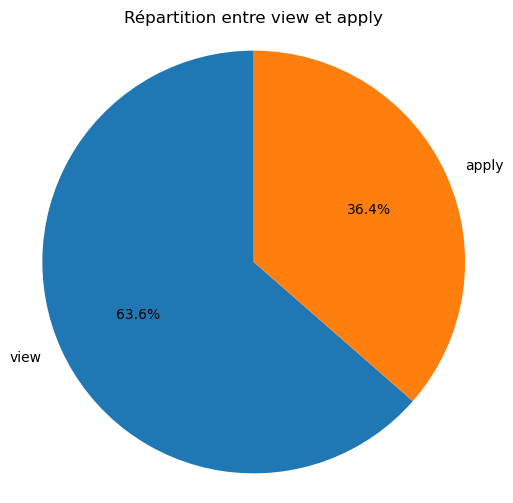

In [7]:
# 3)repartion des actions 
all_actions = [action for sublist in xtrain['actions'] for action in sublist]
nb_view=all_actions.count("view")
nb_apply=all_actions.count("apply")
labels=["view" , "apply"]
sizes=[nb_view , nb_apply]
print(" le nombre de view est de ", nb_view )
print("le nombre de apply est de ", nb_apply)
# le nombre de view est de  76115
#le nombre de apply est de  43632
labels = ["view", "apply"]
sizes = [nb_view, nb_apply]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Répartition entre view et apply")
plt.axis("equal")
plt.show()



In [1]:
#4)  Nombre moyen de consultations par job . 

#mean_consult_per_job = sum(job_counts.values()) / len(job_counts)
#print("La consultation moyenne par job est de :", mean_consult_per_job)  # La consultation moyenne par job est de d'environ 6 . 

Job ID 518 : 176 consultations
Job ID 50 : 164 consultations
Job ID 302 : 163 consultations
Job ID 41 : 159 consultations
Job ID 2975 : 152 consultations
Job ID 1460 : 152 consultations
Job ID 88 : 144 consultations
Job ID 85 : 143 consultations
Job ID 3736 : 142 consultations
Job ID 1620 : 142 consultations
Job ID 221 : 140 consultations
Job ID 214 : 134 consultations
Job ID 58 : 131 consultations
Job ID 312 : 128 consultations
Job ID 457 : 124 consultations
Job ID 1363 : 123 consultations
Job ID 89 : 122 consultations
Job ID 166 : 120 consultations
Job ID 155 : 116 consultations
Job ID 138 : 116 consultations


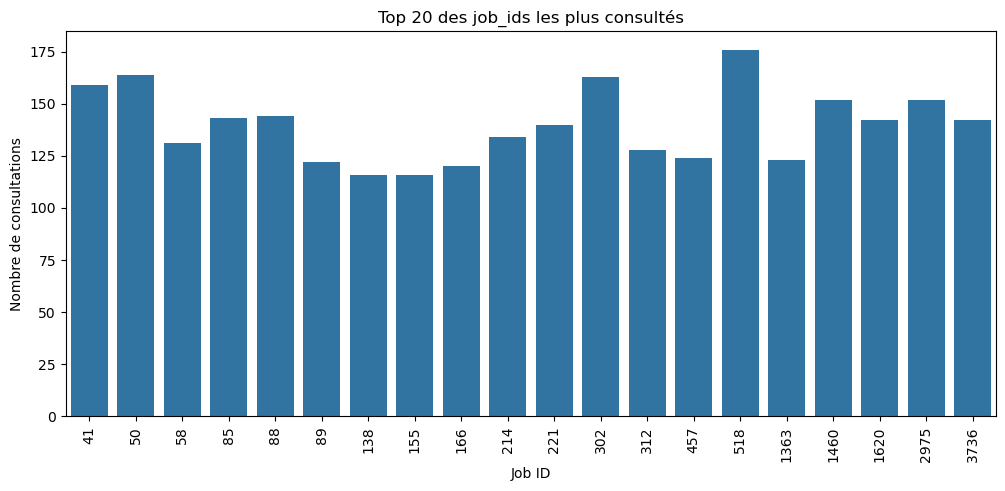

In [9]:
# 5) Les jobs consultés et les plus consultes 

all_jobs = [job for sublist in xtrain['job_ids'] for job in sublist]
from collections import Counter

job_counts = Counter(all_jobs)
top_20_jobs = job_counts.most_common(20)
for job, count in top_20_jobs:
    print(f"Job ID {job} : {count} consultations")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_jobs_df = pd.DataFrame(top_20_jobs, columns=['job_id', 'count'])

plt.figure(figsize=(12,5))
sns.barplot(x='job_id', y='count', data=top_jobs_df)
plt.title("Top 20 des job_ids les plus consultés")
plt.xlabel("Job ID")
plt.ylabel("Nombre de consultations")
plt.xticks(rotation=90)
plt.show()

Top 20 des jobs les plus apply :
Job ID 302 : 106 applications
Job ID 312 : 100 applications
Job ID 1620 : 90 applications
Job ID 518 : 90 applications
Job ID 50 : 90 applications
Job ID 1363 : 82 applications
Job ID 138 : 81 applications
Job ID 2975 : 76 applications
Job ID 313 : 75 applications
Job ID 319 : 74 applications
Job ID 41 : 72 applications
Job ID 441 : 64 applications
Job ID 1686 : 64 applications
Job ID 221 : 63 applications
Job ID 242 : 63 applications
Job ID 155 : 62 applications
Job ID 291 : 61 applications
Job ID 320 : 61 applications
Job ID 991 : 61 applications
Job ID 1460 : 61 applications


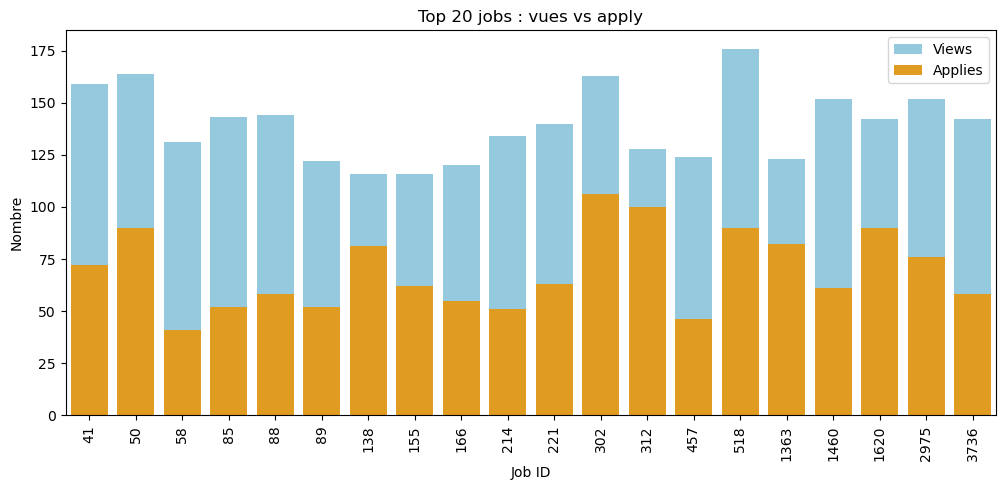

In [10]:
# 6) Comparaison des jobs les plus apply et les plus views . 

apply_jobs = []

for jobs, actions in zip(xtrain['job_ids'], xtrain['actions']):
    # zip permet de parcourir job_ids et actions en parallèle
    for job, action in zip(jobs, actions):
        if action == "apply":
            apply_jobs.append(job)
from collections import Counter

apply_counts = Counter(apply_jobs)
top_20_apply = apply_counts.most_common(20)

print("Top 20 des jobs les plus apply :")
for job, count in top_20_apply:
    print(f"Job ID {job} : {count} applications")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 jobs vus
top_jobs_df = pd.DataFrame(job_counts.most_common(20), columns=['job_id', 'views'])

# Ajouter le nombre d'applies pour ces jobs
top_jobs_df['applies'] = top_jobs_df['job_id'].map(apply_counts).fillna(0).astype(int)

plt.figure(figsize=(12,5))
sns.barplot(x='job_id', y='views', data=top_jobs_df, color='skyblue', label='Views')
sns.barplot(x='job_id', y='applies', data=top_jobs_df, color='orange', label='Applies')
plt.title("Top 20 jobs : vues vs apply")
plt.xlabel("Job ID")
plt.ylabel("Nombre")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Statistiques descriptives sur le fichier joblist

In [11]:
# 1) Contenus du du fichier joblist
nb_joblist=joblist["job_id"].nunique()
print("Le nombre de job dans le fichier joblist est de ", nb_joblist) # Le nombre de job dans le fichier joblist est de  21917

joblist['job_id'].duplicated().sum()
joblist['job_id'].isna().sum 

joblist['text'].str.len().describe() # stats sur le détail des jobs . 

Le nombre de job dans le fichier joblist est de  21917


count    21917.000000
mean      3597.312953
std       1910.558423
min        242.000000
25%       2276.000000
50%       3222.000000
75%       4513.000000
max      35203.000000
Name: text, dtype: float64

In [12]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

[('-', 409242), ('et', 361945), ('des', 298608), ("{'name':", 259625), ("'value':", 259625), ('les', 215807), ('la', 209656), ('none}', 209064), ('en', 170054), ("'type':", 147789), ('à', 133143), ('le', 122658), (':', 111686), ('du', 95169), ('_x000d_', 91120), ("'hard',", 89042), ('pour', 78170), ('sur', 74316), ('dans', 72238), ('avec', 63703)]


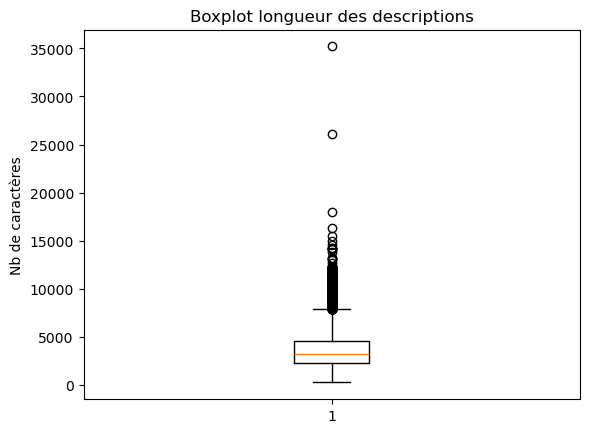

In [13]:
# Utililisation et fréquence des mots 

all_words = ' '.join(joblist['text']).lower().split()
all_words = [w for w in all_words if w not in ENGLISH_STOP_WORDS]
word_counts = Counter(all_words)
print(word_counts.most_common(20) ) # Mots les plus utilisés et leur fréquences d'utilisations . 



# Box de la longueur des caractères . 
plt.boxplot(joblist['text'].str.len())
plt.title("Boxplot longueur des descriptions")
plt.ylabel("Nb de caractères")
plt.show()


### Implémentation d'algorithmes et de modèles

**Méthode 1**: Approche naive

In [91]:
xtrain["job_ids"][0]

[305, 299, 300, 290, 282, 274, 264, 261]

In [57]:
def job_consulted1(data):
    return [x for x in data["job_ids"]]

In [58]:
def matrice_users_offers1 (data_hist):
    # Transformation string → liste d'entiers
    job_consulted = job_consulted1(data_hist)
    flat = [j for sub in job_consulted for j in sub]
    Job_id_max = max(flat)
    nb_session = len(job_consulted)

    # MATRICE SPARSE !!
    matrice_users_offers = np.zeros((nb_session, Job_id_max+1), dtype=np.int8)
    for i, jobs in enumerate(job_consulted):
        for j in jobs:
            matrice_users_offers[i, j] = 1
    return matrice_users_offers

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

def user_sim(matrice_users_offers):
    return cosine_similarity(matrice_users_offers)

In [60]:
def user_kbest_similarity1(k,user_sim):
    user_kbest_similarity=np.zeros((len(user_sim),k))
    for i in range(len(user_sim)):
        user_kbest_similarity[i]=np.argsort(user_sim[i])[::-1][1:k+1]
    return user_kbest_similarity

In [61]:
def matrix_popularity1(user_sim, matrice_users_offers,user_kbest_similarity):
    matrix_popularity = np.zeros((len(user_sim), matrice_users_offers.shape[1]))
    for i in range(len(user_sim)):
        voisins = np.array([int(v) for v in user_kbest_similarity[i]])
        # Moyenne des lignes des voisins → une seule opération NumPy
        matrix_popularity[i] = matrice_users_offers[voisins].mean(axis=0)
    return matrix_popularity

In [98]:
def matrix_pred1(user_sim, job ):
    nb_users = len(user_sim)
    matrix_prediction = np.zeros((nb_users, 10), dtype=int)
    for k in range(nb_users):
        
        # tri décroissant des items populaires du voisinage
        best_prediction = np.argsort(matrix_popularity[k])[::-1]
        
        # items déjà vus
        interacted = job[k]
        
        # retirer les déjà-vus, ordre conservé
        best_prediction_clean = best_prediction[~np.isin(best_prediction, interacted)]
        
        # nombre de prédictions à insérer (au maximum 10)
        n = min(10, len(best_prediction_clean))
        if n > 0:
            matrix_prediction[k] = best_prediction_clean[:n]
    return matrix_prediction

In [105]:
#reciprocal rank
def reciprocal_rank1(file_path, user_sim, data):
    score = []
    test = pd.read_csv(rf"{file_path}")
    test_jb_id = [x for x in test["job_ids"]]
    matrix = matrix_pred1(user_sim, test_jb_id)
    for i in range(len(test_jb_id)):
        jb = test_jb_id[i]
        if jb in matrix[i]:
            # trouver l'indice dans le tableau NumPy
            idx = np.where(matrix[i] == jb)[0][0]
            score.append(1 / (idx + 1))
        else:
            score.append(0)
    score = np.array(score)
    mrr = score.mean()  # MRR global
    return (mrr)


In [78]:
#Emplois consultés par session
job = job_consulted1(xtrain)

#Matrice d'intéraction sessions-emplois
matrice_UO = matrice_users_offers (xtrain)

#Matrice de similarités entre sessions
user_Sim = user_sim(matrice_UO)

In [79]:
#matrice des k meilleurs sessions similaires à chaque session
k=20
user_kbest = user_kbest_similarity(k,user_Sim)
file_path = "x_train_Meacfjr.csv"

#Matrice de popularité de chaque offre auprès de chaque session
matrix_popularity = matrix_popularity1(user_Sim, matrice_UO,user_kbest)

In [106]:
#Matrice de présiction
matrix= matrix_pred1(user_Sim, job)

#Reciprocal Rank
MRR = reciprocal_rank1(file_path, user_Sim, job)

In [107]:
MRR

np.float64(0.0)

Le score obtenu par la méthode donnée en exemple est excécrable.
**Il y a pas d'interêts à procéder à la classification** afin de déterminer quelle action sera éffectuée par session, view ou apply. 
Nous allons donc explorer d'autres pistes.

### Traitement et mise en forme des données 

In [34]:
# Créer un dictionnaire job_id -> embedding
# joblist contient les colonnes : job_id, embedding
job_embedding_map = {row['job_id']: row['embedding'] for _, row in joblist.iterrows()}


#Encoder les actions en 0/1
# view -> 0, apply -> 1
action_map = {'view': 0, 'apply': 1}

#  Fonction pour concaténer embeddings et actions
def concat_embeddings_actions(job_ids, actions):
    """
    job_ids : liste des jobs consultés
    actions : liste des actions correspondantes (view/apply)
    """
    # encoder actions en 0/1
    actions_encoded = [action_map[a] for a in actions]

    # récupérer les embeddings des jobs
    job_embeds = [job_embedding_map[j] for j in job_ids]

    # concaténer chaque embedding avec l'action correspondante
    historique_concat = [job_embeds[i] + [actions_encoded[i]] for i in range(len(job_ids))]

    return historique_concat  # liste de listes, shape = (seq_len, embedding_dim + 1)

# Construire le dataset complet
records = []

for idx, row in xtrain.iterrows():
    session_id = row['session_id']
    job_ids = row['job_ids']
    actions = row['actions']

    # vérifier que la session est dans ytrain
    y_row = ytrain[ytrain['session_id'] == session_id]
    if len(y_row) == 0:
        continue

    # job suivant et action suivante
    job_suivant_id = y_row.iloc[0]['job_id']
    action_suivante = y_row.iloc[0]['action']
    job_suivant_embedding = job_embedding_map[job_suivant_id]
    action_suivante_encoded = action_map[action_suivante]

    # concaténer embeddings et actions
    historique_concat = concat_embeddings_actions(job_ids, actions)

    # ajouter l'enregistrement complet
    records.append({
        'session': session_id,
        'historique_concat': historique_concat,  # embeddings + actions
        'job_suivant_embedding': job_suivant_embedding,
        'action_suivante': action_suivante_encoded  # 0/1
    })

# transformer en DataFrame final
train_dataset = pd.DataFrame(records)

# Vérification
print(train_dataset.head(n=5))

print(train_dataset["historique_concat"].head(n=1))

   session                                  historique_concat  \
0        0  [[-0.05189862474799156, 0.03500966727733612, -...   
1        1  [[0.03826966509222984, 0.05437038838863373, -0...   
2        2  [[-0.06651688367128372, 0.0020125103183090687,...   
3        3  [[1.005788258742541, 1.0059462101198733, 0.939...   
4        4  [[0.8950254172086716, 1.0100133791565895, 0.94...   

                               job_suivant_embedding  action_suivante  
0  [0.038269665, 0.05437039, -0.05387471, -0.0319...                0  
1  [-0.06651688, 0.0020125103, -0.08033009, -0.09...                0  
2  [0.0057882587, 0.00594621, -0.060911275, -0.13...                1  
3  [-0.10497458, 0.010013379, -0.053507783, -0.10...                1  
4  [-0.10756754, 0.00094451837, -0.055855084, 0.0...                1  
0    [[-0.05189862474799156, 0.03500966727733612, -...
Name: historique_concat, dtype: object


### Méthode 2 : APPROCHE FILTRAGE COLLABORATIF : Utilisation de l'indication du sujet  

### 2.1. Définition de la matrice d'interaction entre sessions et les emplois  . 

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
# --- 1) Construire la liste ordonnée des job_ids (colonnes de R) ---
# On prend l'union des job_ids présents dans joblist (tous les jobs disponibles)
jobs_unique = list(joblist['job_id'].astype(str).tolist())  # forcer str si besoin
n_jobs = len(jobs_unique)
print(f"Nombre total de jobs (colonnes R) : {n_jobs}")

# Créer un mapping job_id -> index_col
jobid_to_col = {str(j): idx for idx, j in enumerate(jobs_unique)}

# --- 2) Construire la liste ordonnée des sessions (lignes de R) ---
sessions_unique = xtrain['session_id'].astype(str).tolist()
n_sessions = len(sessions_unique)
print(f"Nombre de sessions (lignes R) : {n_sessions}")

# Créer mapping session_id -> row index
sessionid_to_row = {str(s): idx for idx, s in enumerate(sessions_unique)}

# --- 3) Initialiser la matrice R (n_sessions x n_jobs) avec 0 ---
R = np.zeros((n_sessions, n_jobs), dtype=np.int8)

# --- 4) Remplir R à partir de xtrain ---
# comportement : si plusieurs actions sur le même job dans une session, on garde la valeur la plus "forte" (apply > view)
# valeurs : 0 = no interaction, 1 = view, 2 = apply
for row_idx, row in xtrain.iterrows():
    sess = str(row['session_id'])
    r = sessionid_to_row[sess]
    job_ids = row['job_ids']      # liste (présumée)
    actions = row['actions']      # liste correspondante
    for jid, act in zip(job_ids, actions):
        jid_s = str(jid)
        if jid_s not in jobid_to_col:
            # si le job n'est pas dans joblist (rare), on skip ou on peut ajouter
            continue
        c = jobid_to_col[jid_s]
        # map action -> valeur R
        val = 1 if act == 'view' else (2 if act == 'apply' else 0)
        # conserver la valeur maximale si plusieurs interactions
        if val > R[r, c]:
            R[r, c] = val

print("Shape R:", R.shape)

print(R[0][300])

Nombre total de jobs (colonnes R) : 21917
Nombre de sessions (lignes R) : 15882
Shape R: (15882, 21917)
1


### 2.2. Préparation des encodages 

In [37]:
fixed_embeddings = []

for e in joblist["embedding"]:
    if isinstance(e, np.ndarray):
        fixed_embeddings.append(e.astype(np.float32))
    elif isinstance(e, list):
        fixed_embeddings.append(np.array(e, dtype=np.float32))
    elif isinstance(e, str):
        # essayer de convertir la string
        try:
            arr = np.array(eval(e), dtype=np.float32)
            fixed_embeddings.append(arr)
        except:
            fixed_embeddings.append(None)
    else:
        fixed_embeddings.append(None)

joblist["embedding"] = fixed_embeddings


In [38]:
job_embedding_map = {
    str(row["job_id"]): row["embedding"]
    for _, row in joblist.iterrows()
    if row["embedding"] is not None
}


In [29]:
emb_list = [job_embedding_map[str(j)] for j in jobs_unique 
            if str(j) in job_embedding_map]

emb_matrix = np.vstack(emb_list)
print("Shape emb_matrix :", emb_matrix.shape)


Shape emb_matrix : (21917, 384)


### 2.3. Calcul de la matrice de similarité entre les emplois  Sj 

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

Sj = cosine_similarity(emb_matrix)

print("Shape Sj :", Sj.shape)
print(Sj[:5, :5])


Shape Sj : (21917, 21917)
[[1.0000002  0.6206481  0.39607036 0.49237615 0.46731743]
 [0.6206481  1.0000005  0.28996286 0.40365946 0.28089428]
 [0.39607036 0.28996286 1.0000004  0.43335363 0.33935314]
 [0.49237615 0.40365946 0.43335363 0.99999976 0.43458062]
 [0.46731743 0.28089428 0.33935314 0.43458062 1.0000001 ]]


### 2.4. Calcul de la matrice de similarité entre les sessions 

In [40]:
# --- 7) Matrice de similarité entre sessions S_s --- # tuilisation de la moyenne . 
# calculer embedding moyen par session (moyenne des embeddings des jobs consultés dans la session)

# prendre le premier embedding du dictionnaire pour définir la dimension
sample_emb = next(iter(job_embedding_map.values()))
emb_dim = len(sample_emb)
print("Dimension des embeddings :", emb_dim)


session_embs = np.zeros((n_sessions, emb_dim), dtype=float)
for row_idx, row in xtrain.iterrows():
    sess = str(row['session_id'])
    r = sessionid_to_row[sess]
    job_ids = row['job_ids']
    # collecter embeddings valides
    vecs = []
    for jid in job_ids:
        emb = job_embedding_map.get(str(jid), None)
        if emb is not None:
            vecs.append(np.array(emb, dtype=float))
    if len(vecs) == 0:
        # si aucune embedding trouvé -> vecteur zero (ou np.nan selon préférence)
        session_embs[r, :] = np.zeros(emb_dim, dtype=float)
    else:
        session_embs[r, :] = np.mean(np.vstack(vecs), axis=0)

# similarity between sessions (n_sessions x n_sessions)
Ss = cosine_similarity(session_embs)
print("Shape Ss (session-session similarity):", Ss.shape)


Sj_df = pd.DataFrame(Sj, index=jobs_unique, columns=jobs_unique)
Ss_df = pd.DataFrame(Ss, index=sessions_unique, columns=sessions_unique)



Dimension des embeddings : 384
Shape Ss (session-session similarity): (15882, 15882)


### 2.5. Determination des k sessions les plus similaires 

In [41]:


import numpy as np
import pandas as pd

def top_k_similar_sessions(session_id, Ss, sessions_unique, k=10):
    """
    Retourne les k sessions les plus similaires à une session donnée.

    Parameters
    ----------
    session_id : str ou int
        L'identifiant de la session cible.
    Ss : numpy.ndarray
        Matrice de similarité entre sessions (n_sessions x n_sessions).
    sessions_unique : list
        Liste des sessions dans le même ordre que les lignes/colonnes de Ss.
    k : int
        Nombre de sessions similaires à retourner.

    Returns
    -------
    DataFrame avec les sessions les plus proches et leur similarité.
    """
    session_id = str(session_id)
    
    if session_id not in sessions_unique:
        raise ValueError(f"La session {session_id} n'existe pas dans sessions_unique.")

    # index de la session cible
    idx = sessions_unique.index(session_id)

    # vecteur de similarité avec toutes les sessions
    sim_vector = Ss[idx, :]

    # on enlève la session elle-même
    sim_vector_excluding_self = sim_vector.copy()
    sim_vector_excluding_self[idx] = -1  

    # indices triés par similarité décroissante
    top_idx = np.argsort(sim_vector_excluding_self)[::-1][:k]

    result = pd.DataFrame({
        "session_id": [sessions_unique[i] for i in top_idx],
        "similarity": [sim_vector[i] for i in top_idx]
    })

    return result


### 2.6. Scores de popularités des jobs 

In [42]:
import numpy as np
import pandas as pd

def popularity_score_for_session(session_id, R, Ss, sessions_unique, jobs_unique, k=10):
    """
    Calcule les scores de popularité P_s(j) pour tous les jobs j,
    pour une session cible s, en utilisant les k sessions les plus similaires.
    """
    
    # 1) Trouver les k sessions les plus proches (les plus similaires  . 
    neighbors_df = top_k_similar_sessions(session_id, Ss, sessions_unique, k)
    neighbor_ids = neighbors_df["session_id"].tolist()

    # 2) Convertir en indices dans R
    neighbor_indices = [sessions_unique.index(s) for s in neighbor_ids]

    # 3) Extraire les lignes correspondantes dans R
    R_neighbors = R[neighbor_indices, :]   # shape (k, n_jobs)

    # 4) Calculer Ps(j) = somme sur les k sessions
    Ps = np.sum(R_neighbors, axis=0)  # shape (n_jobs,)

    # 5) Retourner sous forme de dataframe
    df = pd.DataFrame({
        "job_id": jobs_unique,
        "popularity_score": Ps
    }).sort_values("popularity_score", ascending=False)

    return df


In [43]:
Ps_df = popularity_score_for_session(
    session_id=1,
    R=R,
    Ss=Ss,
    sessions_unique=sessions_unique,
    jobs_unique=jobs_unique,
    k=10
)

Ps_df.head(20)


,job_id,popularity_score
58,58,6
254,254,4
88,88,4
1407,1409,4
2742,2762,4
1057,1059,3
411,411,3
252,252,3
2480,2499,3
988,990,3


### 2.7. Prédiction de l'intention ou non de postuler 

In [44]:
def predict_intention_for_session(session_id, R, Ss, sessions_unique, jobs_unique, k_neighbors=10, n_top_jobs=10, threshold=3):
    """
    Prédire l'intention ("apply" ou "view") d'une session en se basant sur :
    - les k sessions les plus proches,
    - les 10 jobs les plus populaires,
    - la moyenne de leurs P_s(j). """

    # 1) Calcul des P_s(j) pour tous les jobs
    Ps_df = popularity_score_for_session(
        session_id=session_id,
        R=R,
        Ss=Ss,
        sessions_unique=sessions_unique,
        jobs_unique=jobs_unique,
        k=k_neighbors
    )

    # 2) Prendre les n_top_jobs
    top_jobs = Ps_df.head(n_top_jobs)

    # 3) Score intention = moyenne des P_s(j) sur ces jobs
    mean_score = top_jobs["popularity_score"].mean()

    # 4) Décision
    intent = "apply" if mean_score >= threshold  else "view"

    return {
        "intent": intent,
        "score": mean_score,
        "top_jobs": top_jobs
    }


In [45]:
result = predict_intention_for_session(
    session_id=3,
    R=R,
    Ss=Ss,
    sessions_unique=sessions_unique,
    jobs_unique=jobs_unique,
    k_neighbors=10,
    n_top_jobs=10,
    threshold=6
)

print(result["intent"], result["score"])
print(result["top_jobs"])


view 4.0
     job_id  popularity_score
1558   1560                 6
1480   1482                 5
285     285                 4
291     291                 4
306     306                 4
293     293                 4
1361   1363                 4
135     135                 3
262     262                 3
1575   1577                 3


### 2.8. Score MRR

In [52]:
def evaluate_next_job_mrr(R, Ss, sessions_unique, jobs_unique, ytrain, k_neighbors=10, n_top_jobs=10):
    """
    Évalue le Mean Reciprocal Rank (MRR) pour la prédiction du prochain job.
    """
    reciprocal_ranks = []

    for session_id in sessions_unique:
        # vérifier que cette session a un job suivant
        y_row = ytrain[ytrain["session_id"] == session_id]
        if len(y_row) == 0:
            continue

        true_job = y_row.iloc[0]["job_id"]

        # calcul des P_s(j)
        Ps_df = popularity_score_for_session(
            session_id=session_id,
            R=R,
            Ss=Ss,
            sessions_unique=sessions_unique,
            jobs_unique=jobs_unique,
            k=k_neighbors
        )

        top_jobs = Ps_df.head(n_top_jobs)["job_id"].tolist()

        if true_job in top_jobs:
            rank = top_jobs.index(true_job) + 1  # +1 car index 0-based
            reciprocal_ranks.append(1.0 / rank)
        else:
            reciprocal_ranks.append(0.0)

    # MRR = moyenne des reciprocal ranks
    mrr = np.mean(reciprocal_ranks) if len(reciprocal_ranks) > 0 else 0
    return mrr
mrr_score = evaluate_next_job_mrr(R, Ss, sessions_unique, jobs_unique, ytrain, k_neighbors=10, n_top_jobs=10)
print(mrr_score , "est le score MRR" )

0 est le score MRR


 Avec cette approche , nous obtenons un score MRR nul c'est à dire que cette approche ne permet pas du tout de prédire avec précision les prochains jobs et même  ces prédictions ne sont pas dans le top 10 .

 
 Cette methode ne prend pas en compte l'ordre de consultation dans les historiques , ce qui est un facteur important pour prédire la prochaine offre à consulter . Utilisons donc une approche qui prenne en compte ce facteur en utilisant les réseaux de neurones recursifs plus précisement le LST

### Méthode 3 : Deep Learning : Approche RNN; LSTM avec comme sortie les identifiants des offres d'emplois.

### 3.1. Préparation des données d'entrainement 

In [15]:
# -------------------------------
# Construire le dataset complet avec job_suivant_id et action_suivante
# -------------------------------
records = []

for idx, row in xtrain.iterrows():
    session_id = row['session_id']
    job_ids = row['job_ids']
    actions = row['actions']

    # récupérer la ligne correspondante dans ytrain
    y_row = ytrain[ytrain['session_id'] == session_id]
    if len(y_row) == 0:
        continue

    job_suivant_id = y_row.iloc[0]['job_id']
    action_suivante = y_row.iloc[0]['action']
    action_suivante_encoded = action_map[action_suivante]

    # construire la séquence X = embeddings + actions
    historique_concat = concat_embeddings_actions(job_ids, actions)

    # ajouter un enregistrement complet avec job_suivant_id
    records.append({
        'session': session_id,
        'historique_concat': historique_concat,       # embeddings + actions
        'job_suivant_id': job_suivant_id,            # ajouter job_id pour la classification
        'action_suivante': action_suivante_encoded
    })

train_dataset = pd.DataFrame(records)


In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# -------------------------------
# Préparer X pour LSTM
# -------------------------------
# historique_concat contient déjà embeddings + action
X_sequences = train_dataset['historique_concat'].tolist()

# padding pour gérer les séquences de longueurs différentes
X_padded = pad_sequences(
    X_sequences,
    padding='post',  # ajouter des zéros à la fin
    dtype='float32'
)

# -------------------------------
#  Préparer y pour LSTM
# -------------------------------
# job suivant -> multi-classe
le_job = LabelEncoder()
y_job_encoded = le_job.fit_transform(train_dataset['job_suivant_id'])

# action suivante -> binaire
y_action = np.array(train_dataset['action_suivante'].tolist())

# -------------------------------
#  Vérification
# -------------------------------
print("X_padded shape :", X_padded.shape)          # (num_sessions, max_seq_len, embedding_dim+1)
print("y_job_encoded shape :", y_job_encoded.shape)  # (num_sessions,)
print("y_action shape :", y_action.shape)            # (num_sessions,)
print("Exemple X_padded[0] :", X_padded[0])
print("Exemple y_job_encoded[0] :", y_job_encoded[0])
print("Exemple y_action[0] :", y_action[0])


X_padded shape : (15882, 15, 385)
y_job_encoded shape : (15882,)
y_action shape : (15882,)
Exemple X_padded[0] : [[-0.05189862  0.03500967 -0.12723897 ...  0.05940381 -0.023575
   0.        ]
 [-0.05616656  0.02116325 -0.00715085 ...  0.02085603 -0.04956937
   0.        ]
 [-0.09892413 -0.04036    -0.05117183 ...  0.04011431  0.05385775
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Exemple y_job_encoded[0] : 81
Exemple y_action[0] : 0


In [17]:
# Préparation de y_train

y_train = {
    'job_output': y_job_encoded,    # multi-classe : job suivant
    'action_output': y_action       # binaire : action suivante
}


In [18]:
from sklearn.model_selection import train_test_split

# Séparer X et y en train / validation (80/20)
X_train, X_val, y_job_train, y_job_val, y_action_train, y_action_val = train_test_split(
    X_padded,
    y_job_encoded,
    y_action,
    test_size=0.2,
    random_state=42
)

print("Taille X_train:", X_train.shape)
print("Taille X_val:", X_val.shape)


Taille X_train: (12705, 15, 385)
Taille X_val: (3177, 15, 385)


### 3.2. Définition du modèle LSTM 

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

embedding_dim_plus_action = X_padded.shape[2]
num_jobs = len(le_job.classes_)

# Définir le modèle
inputs = Input(shape=(X_padded.shape[1], embedding_dim_plus_action))
x = LSTM(128, return_sequences=False)(inputs)

# sortie job suivant (multi-class)
job_output = Dense(num_jobs, activation='softmax', name='job_output')(x)

# sortie action suivante (binaire)
action_output = Dense(1, activation='sigmoid', name='action_output')(x)

model = Model(inputs=inputs, outputs=[job_output, action_output])

model.compile(
    optimizer='adam',
    loss={'job_output': 'sparse_categorical_crossentropy',
          'action_output': 'binary_crossentropy'},
    metrics={'job_output': 'accuracy',
             'action_output': 'accuracy'}
)

# Entraîner le modèle
history = model.fit(
    X_train,
    {'job_output': y_job_train, 'action_output': y_action_train},
    validation_data=(X_val, {'job_output': y_job_val, 'action_output': y_action_val}),
    epochs=30,
    batch_size=32
)


Epoch 1/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - action_output_accuracy: 0.7936 - action_output_loss: 0.4648 - job_output_accuracy: 8.6580e-04 - job_output_loss: 8.7747 - loss: 9.2424 - val_action_output_accuracy: 0.8071 - val_action_output_loss: 0.4592 - val_job_output_accuracy: 9.4429e-04 - val_job_output_loss: 8.5779 - val_loss: 9.0343
Epoch 2/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - action_output_accuracy: 0.8198 - action_output_loss: 0.4112 - job_output_accuracy: 0.0014 - job_output_loss: 8.2727 - loss: 8.6846 - val_action_output_accuracy: 0.8174 - val_action_output_loss: 0.4186 - val_job_output_accuracy: 0.0038 - val_job_output_loss: 8.7481 - val_loss: 9.1641
Epoch 3/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - action_output_accuracy: 0.8224 - action_output_loss: 0.4005 - job_output_accuracy: 0.0019 - job_output_loss: 7.9929 - loss: 8.3936 - val_action_output_accuracy: 0.8089 - val_action_output_loss: 0.4532 - val_job_output_accuracy: 0.0054 - val_job_output_loss:

### 3.3. Evaluation du modèle 

 ### 3.3.1. Score MRR

In [25]:
import numpy as np

def compute_mrr_from_probs(y_true, y_pred_prob, k=10):
    """
    y_true : tableau (n,) des vrais job_ids encodés
    y_pred_prob : tableau (n, num_classes) des probabilités softmax
    k : top-k pour le MRR (par défaut 10)
    """

    # On trie par probabilité décroissante → top-k prédictions
    top_k_preds = np.argsort(-y_pred_prob, axis=1)[:, :k]

    scores = []

    for true, preds in zip(y_true, top_k_preds):
        if true in preds:
            rank = np.where(preds == true)[0][0] + 1  # rang réel
            scores.append(1.0 / rank)
        else:
            scores.append(0.0)  # pas dans le top-10

    return np.mean(scores)


# -----------------------
# Utilisation
# -----------------------

mrr_at_10 = compute_mrr_from_probs(y_job_val, y_pred_job_prob, k=10)

print("Le score MRR est de : ", mrr_at_10)


Le score MRR est de :  0.011484953859835821


### 3.3.2. Précision de la prédiction de la prochaine action (View ou apply)


Étant donné que le nombre d'actions view est largement supérieur au nombre d'actions apply,

nous devons chercher un seuil de probabilité raisonnable pour prédire l'action view ou apply.


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prédictions de base avec seuil 0.5
y_pred_action_05 = (y_pred_action_prob > 0.5).astype(int)

print("=== Scores Action (seuil = 0.5) ===")
print("Accuracy :", accuracy_score(y_action_val, y_pred_action_05))
print("Precision :", precision_score(y_action_val, y_pred_action_05))
print("Recall :", recall_score(y_action_val, y_pred_action_05))
print("F1 :", f1_score(y_action_val, y_pred_action_05))
print("\nReport :\n", classification_report(y_action_val, y_pred_action_05))


=== Scores Action (seuil = 0.5) ===
Accuracy : 0.8057916273213723
Precision : 0.7825711820534944
Recall : 0.7130503144654088
F1 : 0.7461949814890991

Report :
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1905
           1       0.78      0.71      0.75      1272

    accuracy                           0.81      3177
   macro avg       0.80      0.79      0.79      3177
weighted avg       0.80      0.81      0.80      3177



In [23]:
from sklearn.metrics import precision_recall_curve
import numpy as np

prec, rec, thresholds = precision_recall_curve(y_action_val, y_pred_action_prob)
f1 = 2 * (prec * rec) / (prec + rec + 1e-8)

best_threshold = thresholds[np.argmax(f1)]
print("Meilleur seuil optimisé =", best_threshold)


🔧 Meilleur seuil optimisé = 0.38015673


In [24]:
# Prédictions pour avec le meilleur seuil . 
y_pred_action_best = (y_pred_action_prob > best_threshold).astype(int)

print("\n=== Scores Action (seuil optimisé) ===")
print("Accuracy :", accuracy_score(y_action_val, y_pred_action_best))
print("Precision :", precision_score(y_action_val, y_pred_action_best))
print("Recall :", recall_score(y_action_val, y_pred_action_best))
print("F1 :", f1_score(y_action_val, y_pred_action_best))
print("\nReport :\n", classification_report(y_action_val, y_pred_action_best))



=== Scores Action (seuil optimisé) ===
Accuracy : 0.8083097261567517
Precision : 0.7520912547528517
Recall : 0.7775157232704403
F1 : 0.7645921917278701

Report :
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1905
           1       0.75      0.78      0.76      1272

    accuracy                           0.81      3177
   macro avg       0.80      0.80      0.80      3177
weighted avg       0.81      0.81      0.81      3177



### 3.3.3 Résultats du LSTM

Cette approche permet d'avoir un précision sur la prédiction de la prochaine action  avec une précision  de 80 % . 

Cependant le score MRR est toujours autant trop bas  . Ce qui implique que le modèle a clairement du mal à apprendre des données qu'on lui fournit ainsi que des séquences en jeux dans les historiques . 